### Importing Dependencies

In [1]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf

In [2]:
df = pd.read_csv('combined_snp100_data.csv')

### Removing unwanted columns

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,Symbol,Name,Date,Adj_Close,Close,High,Low,Open,Volume,Spred-HL,Spread-OC
0,AAPL,Apple Inc.,2020-01-02,74.444603,75.087502,75.150002,73.797501,74.059998,"135,480,400",-1.352501,1.027504
1,AAPL,Apple Inc.,2020-01-03,73.720840,74.357498,75.144997,74.125000,74.287498,"146,322,800",-1.019997,0.070000
2,AAPL,Apple Inc.,2020-01-06,74.308266,74.949997,74.989998,73.187500,73.447502,"118,387,200",-1.802498,1.502495
3,AAPL,Apple Inc.,2020-01-07,73.958794,74.597504,75.224998,74.370003,74.959999,"108,872,000",-0.854996,-0.362495
4,AAPL,Apple Inc.,2020-01-08,75.148521,75.797501,76.110001,74.290001,74.290001,"132,079,200",-1.820000,1.507500


In [7]:
df.to_csv('candlestick.csv')

### Adding Spread to the data

In [5]:
df['Spred-HL']=df['Low']-df['High']
df['Spread-OC']=df['Close']-df['Open']

In [81]:
def candle(data):
    data=data.drop('Unnamed: 0',axis=1)
    data['Date']=pd.to_datetime(data['Date'])
    data=data.set_index('Date')
    data.Volume=pd.to_numeric(data.Volume,errors='coerce')
    return mpf.plot(data['2020-01':'2020-04'],figratio=(20,12),
            type='candle',
            tight_layout = True,
            style='yahoo')

In [82]:
df_apple = df[df['Symbol']=='AAPL']

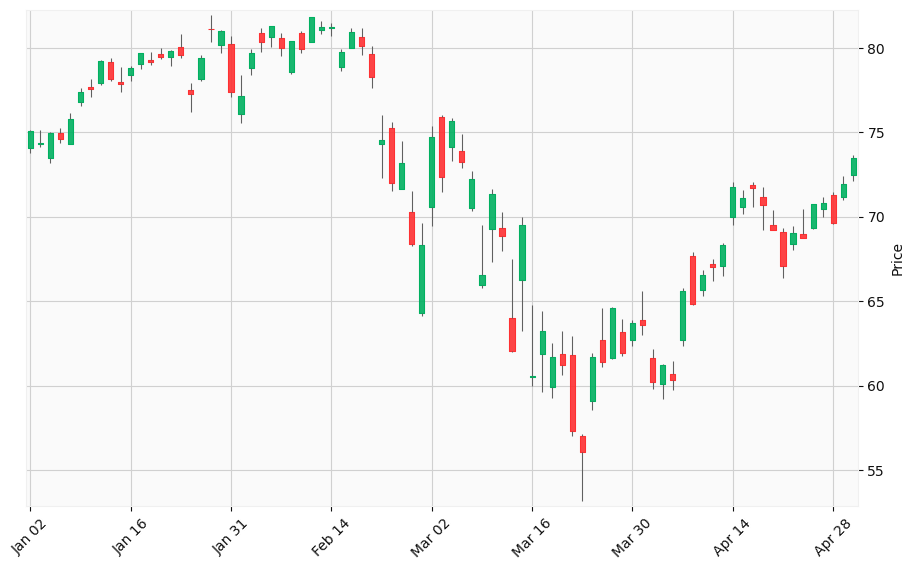

In [83]:
candle(df_apple)